In [18]:
import tweepy
import re 
import nltk
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tweepy import OAuthHandler 
from textblob import TextBlob 
from textblob.np_extractors import ConllExtractor

def connect():
    consumer_key = '3xfbX6QAsaSV9OKXqIi1wuqjH'
    consumer_secret = 'lW70DalGH1d4e9WY8T01FBYYWx7fXADtKUsqtGCUKked3u2KIn'
    access_token = '1450862068022710277-ZgHwZHnuyok66mfRUICiyfg8K0Z809'
    access_token_secret = 'OUUkqBVuTT0MU1vyrmdyoFyA18MC9gR5cIr4MVtLQ4vlx'
    

    try:
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_token_secret)
        api = tweepy.API(auth)
        return api
    except:
        print("Error")
        exit(1)
        



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kimson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def cleanText(text):
  text = text.lower()
  # Removes all mentions (@username) from the tweet since it is of no use to us
  text = re.sub(r'(@[A-Za-z0-9_]+)', '', text)
    
  # Removes any link in the text
  text = re.sub('http://\S+|https://\S+', '', text)

  # Only considers the part of the string with char between a to z or digits and whitespace characters
  # Basically removes punctuation
  text = re.sub(r'[^\w\s]', '', text)

  # Removes stop words that have no use in sentiment analysis 
  text_tokens = word_tokenize(text)
  text = [word for word in text_tokens if not word in stopwords.words()]

  text = ' '.join(text)
  return text

In [5]:
def stem(text):
  # This function is used to stem the given sentence
  porter = PorterStemmer()
  token_words = word_tokenize(text)
  stem_sentence = []
  for word in token_words:
    stem_sentence.append(porter.stem(word))
  return " ".join(stem_sentence)

In [6]:
def sentiment(cleaned_text):
  # Returns the sentiment based on the polarity of the input TextBlob object
  if cleaned_text.sentiment.polarity > 0:
    return 'positive'
  elif cleaned_text.sentiment.polarity < 0:
    return 'negative'
  else:
    return 'neutral'

In [7]:
def fetch_tweets(query, count = 50):
  api = connect() # Gets the tweepy API object
  tweets = [] # Empty list that stores all the tweets

  try:
    # Fetches the tweets using the api
    fetched_data = api.search_tweets(q = query + ' -filter:retweets', 
count = count)
    for tweet in fetched_data:
      txt = tweet.text
      clean_txt = cleanText(txt) # Cleans the tweet
      stem_txt = TextBlob(stem(clean_txt)) # Stems the tweet
      sent = sentiment(stem_txt) # Gets the sentiment from the tweet
      tweets.append((txt, clean_txt, sent))
    return tweets
  except tweepy.errors.TweepyException as e:
    print("Error : " + str(e))
    exit(1)

In [8]:
tweets = fetch_tweets(query = 'matrix', count = 200) #u change the topic here.
# Converting the list into a pandas Dataframe
df = pd.DataFrame(tweets, columns= ['tweets','clean_tweets','sentiment'])

# Dropping the duplicate values just in case there are some tweets that are copied and then stores the data in a csv file
df = df.drop_duplicates(subset='clean_tweets')
df.to_csv('data.csv', index= False)
ptweets = df[df['sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(tweets)
ntweets = df[df['sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(tweets)
print(f'Positive tweets {p_perc} %')
print(f'Neutral tweets {100 - p_perc - n_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 21.0 %
Neutral tweets 73.0 %
Negative tweets 6.0 %


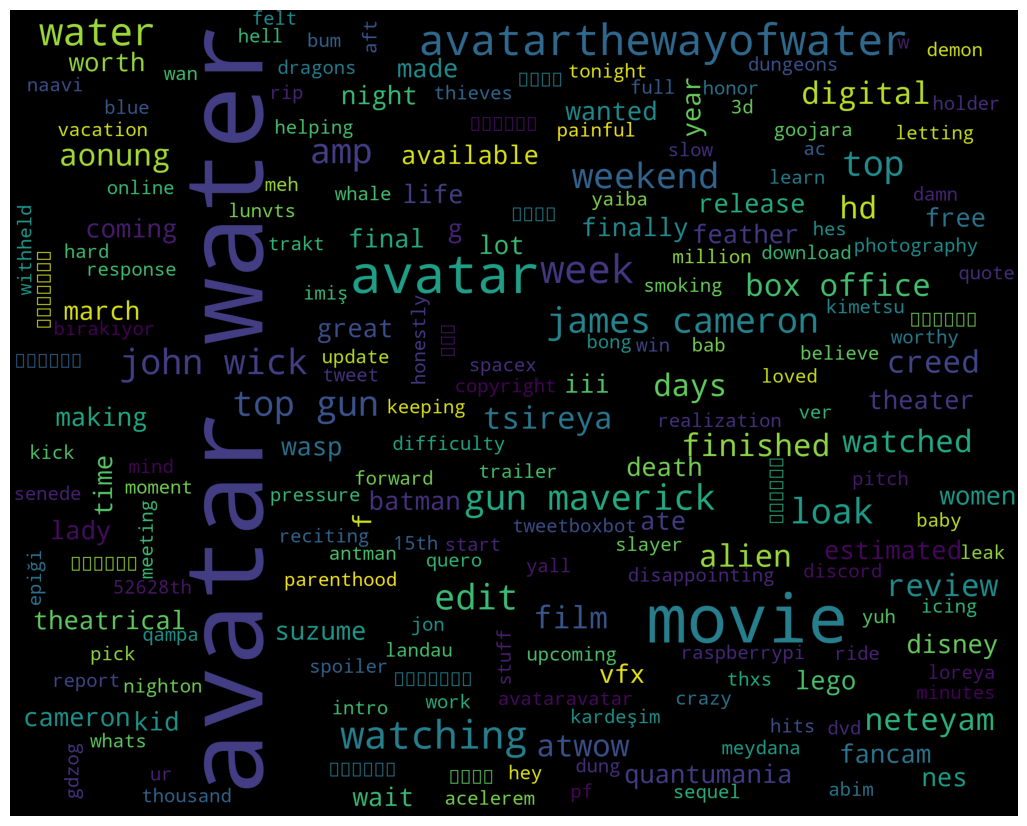

In [9]:
twt = " ".join(df['clean_tweets'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=2500, height=2000).generate(twt)

plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
tweets

[("Avatar Way of the Water was.... \n\nDisappointing.... I wanted it to be something it wasn't and I just felt 'meh' aft… https://t.co/Eye5zVPVqR",
  'avatar water disappointing wanted felt meh aft',
  'neutral'),
 ('The parenthood stuff in Avatar The Way of Water and slow realization that he’s being too hard on his kids hits me r… https://t.co/y2EGe5nMbx',
  'parenthood stuff avatar water slow realization hes hard kids hits r',
  'negative'),
 ('Avatar: The Way of Water https://t.co/CRF3Lorzei',
  'avatar water',
  'neutral'),
 ('Just finished watching AVATAR THE WAY OF WATER ✌️✌️✌️😁😁😁',
  'finished watching avatar water',
  'neutral'),
 ('وجاء في المركز العاشر والاخير فيلم الخيال العلمي Avatar: The Way of Water للمخرج المبدع "جيمس كاميرون" \n\nحيث حقق في… https://t.co/NAleGfFSBU',
  'وجاء المركز العاشر والاخير فيلم الخيال العلمي avatar water للمخرج المبدع جيمس كاميرون حقق',
  'neutral'),
 ('Just finished Avatar, the way of water and honestly the death there was really painful.\nReall

In [11]:
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

sentiment
negative     6
neutral     65
positive    21
dtype: int64


<Axes: >

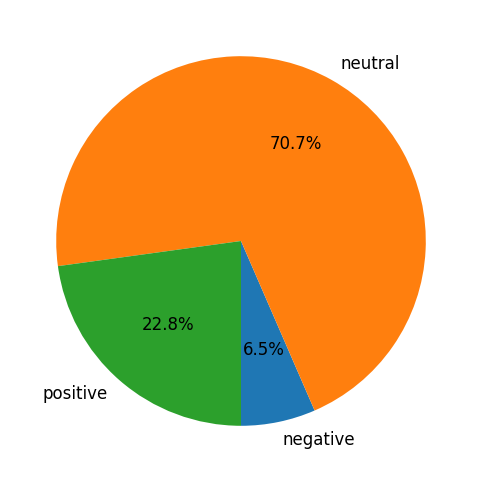

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [13]:
df.head(100)

,tweets,clean_tweets,sentiment
0,Avatar Way of the Water was.... \n\nDisappoint...,avatar water disappointing wanted felt meh aft,neutral
1,The parenthood stuff in Avatar The Way of Wate...,parenthood stuff avatar water slow realization...,negative
2,Avatar: The Way of Water https://t.co/CRF3Lorzei,avatar water,neutral
3,Just finished watching AVATAR THE WAY OF WATER...,finished watching avatar water,neutral
4,وجاء في المركز العاشر والاخير فيلم الخيال العل...,وجاء المركز العاشر والاخير فيلم الخيال العلمي ...,neutral
...,...,...,...
94,Anyone grow up with Avatar 2: The Way of Water...,grow avatar 2 water nes nes retrogames avatart...,neutral
95,@AvatarNews_ Since Avatar the Way of Water goe...,avatar water digital week itll theatres,neutral
96,ప్రముఖ ఓటీటీల్లో అవతార్ 2.. మరికొన్ని గంటల్లో ...,పరమఖ ఓటటలల అవతర 2 మరకనన గటలల సటరమగ avatar2ott ...,neutral
97,I wonder how many people have heard the subtle...,wonder heard subtle reply diss south park avat...,neutral


In [14]:
class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        """Finds NP (nounphrase) leaf nodes of a chunk tree."""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        """Normalises words to lowercase and stems and lemmatizes it."""
        word = word.lower()
        # word = self.stemmer.stem_word(word) # We will loose the exact meaning of the word 
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        """Checks conditions for acceptable word: length, stopword. We can increase the length if we want to consider large phrase"""
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term


In [15]:
sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

In [15]:

df.head(100)

,tweets,clean_tweets,sentiment
0,Que rolê mais aleatório. Eu nunca vivi um rolê...,rolê aleatório nunca vivi rolê tão aleatório t...,neutral
1,@MW2CODHub It probably would hurt a lot of peo...,probably hurt lot peoples feelings john wick f...,neutral
2,@mhimvi فیلم هایی که دست‌کم تا چند روز شما را ...,فیلم هایی که دستکم تا چند روز شما را دچار وحشت...,negative
3,"@Sophie_Keeffe Natal? Neo? I said the Matrix, ...",natal neo matrix muttrix,neutral
4,@marlboro_matrix 美味しそう🥲これからスーパー銭湯♨️娘と孫と。電気風呂に入...,美味しそうこれからスーパー銭湯娘と孫と電気風呂に入って来る,neutral
...,...,...,...
95,@elonmusk I hope you're doing okay I have info...,hope youre information,neutral
96,おやつ😋\n(*´༥`*)ﾓｸﾞﾓｸﾞ https://t.co/OevcMdQVrA,おやつ ༥ﾓｸﾞﾓｸﾞ,neutral
97,@saifullahawan40 Ye dhek Kam zarf insaan. Isko...,dhek zarf insaan isko kehty jasla free biryani...,positive
98,@LarpVonTrier Matrix 1 is all that matters. \n...,matrix 1 matters fine revitalised dystopian cy...,positive


In [16]:
stopwords = set(stopwords.words("english"))

In [17]:
key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in df.iterrows(): 
    toks = nltk.regexp_tokenize(row.clean_tweets, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    tweet_phrases = []

    for term in terms:
        if len(term):
            tweet_phrases.append(' '.join(term))
    
    key_phrases.append(tweet_phrases)
    
key_phrases[:10]

[['avatar water', 'felt meh aft'],
 ['parenthood stuff avatar water slow realization he hard kid hit'],
 ['avatar water'],
 ['avatar water'],
 ['وجاء المركز العاشر والاخير فيلم الخيال العلمي avatar water للمخرج المبدع جيمس كاميرون حقق'],
 ['avatar water', 'death painful movie'],
 ['gdzog movie nighton kick discord tonight baby',
  'yall',
  'pick john wick',
  'dung'],
 ['film day vacation top gun maverick john', 'avatar'],
 ['avatar water moment'],
 ['avatar water great movie crazy']]

In [18]:
df.head(10)

,tweets,clean_tweets,sentiment
0,Que rolê mais aleatório. Eu nunca vivi um rolê...,rolê aleatório nunca vivi rolê tão aleatório t...,neutral
1,@MW2CODHub It probably would hurt a lot of peo...,probably hurt lot peoples feelings john wick f...,neutral
2,@mhimvi فیلم هایی که دست‌کم تا چند روز شما را ...,فیلم هایی که دستکم تا چند روز شما را دچار وحشت...,negative
3,"@Sophie_Keeffe Natal? Neo? I said the Matrix, ...",natal neo matrix muttrix,neutral
4,@marlboro_matrix 美味しそう🥲これからスーパー銭湯♨️娘と孫と。電気風呂に入...,美味しそうこれからスーパー銭湯娘と孫と電気風呂に入って来る,neutral
5,Excited to share the latest addition to my #et...,excited share latest addition etsy shop black ...,positive
6,wrest control of Florida from the Spanish and ...,wrest control florida spanish yorkers visiting...,neutral
7,shaped my life. Yours too. The Matrix is the r...,shaped life matrix reason orange juice breakfa...,neutral
8,"@1ightbring3r How sad to be in that ""real time...",sad real time middle brainwashed matrix,negative
9,"No clue what I'm doing, but the #MIDI Matrix i...",clue midi matrix kinda fun,positive


In [19]:

tweets

[('Que rolê mais aleatório. Eu nunca vivi um rolê tão aleatório. Foi tipo uma falha absurda na Matrix que se eu contar ninguém acredita',
  'rolê aleatório nunca vivi rolê tão aleatório tipo falha absurda matrix contar ninguém acredita',
  'neutral'),
 ('@MW2CODHub It probably would hurt a lot of people’s feelings to know that the John Wick films use just as much CGI as the Matrix movies.',
  'probably hurt lot peoples feelings john wick films cgi matrix movies',
  'neutral'),
 ('@mhimvi فیلم هایی که دست\u200cکم تا چند روز شما را دچار وحشت و توهم خواهند کرد\nThe Conversation\nThe Game\nIt Follows\nThey… https://t.co/pp6b6xbe91',
  'فیلم هایی که دستکم تا چند روز شما را دچار وحشت توهم خواهند کرد conversation game',
  'negative'),
 ('@Sophie_Keeffe Natal? Neo? I said the Matrix, not the Muttrix.',
  'natal neo matrix muttrix',
  'neutral'),
 ('@marlboro_matrix 美味しそう\U0001f972これからスーパー銭湯♨️娘と孫と。電気風呂に入って来る😊',
  '美味しそうこれからスーパー銭湯娘と孫と電気風呂に入って来る',
  'neutral'),
 ('Excited to share the latest addi